# Lab 3 Classification 1 (kNN, k Fold Validation, Gridsearch, Logistic Regression & Perceptron)
# DS310 Fall 2021


#k-Nearest Neighbors
The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).


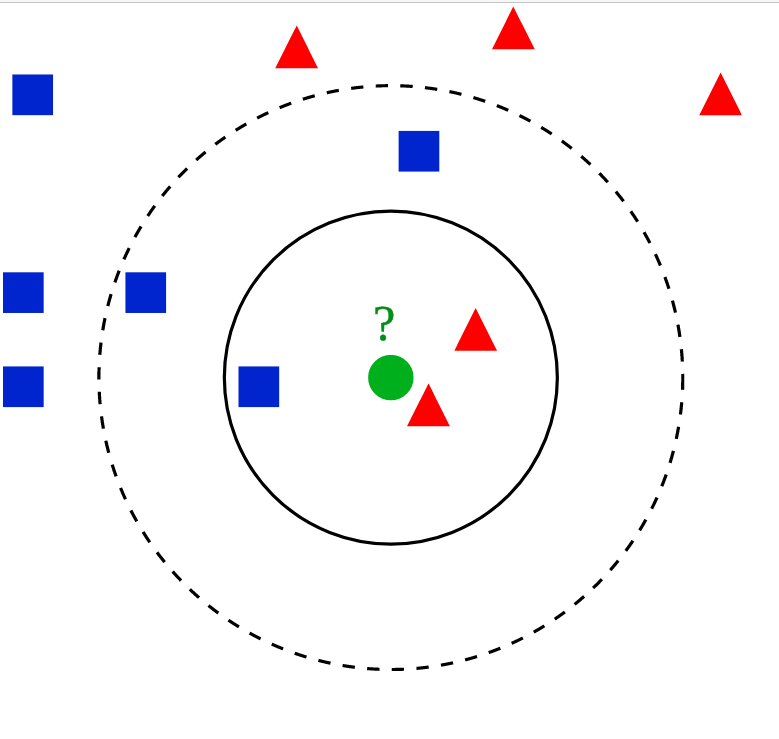

In [ ]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv("https://raw.githubusercontent.com/suhasbn/DS310/master/diabetes.csv")
#check data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#check number of rows and columns in dataset
df.shape

(768, 9)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#separate target values
y = df['Outcome'].values
#view the first five target values
y[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
#‘random_state’ to 1 ensures that we get the same split each time thus, recreating our results becomes easy.
#By setting ‘stratify’ = y makes our training split represent the proportion of each value in the y variable. 
#For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, 
#setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) #80-20 split

In [ ]:
print("X_train dim :",X_train.shape)
print("y_train dim :",y_train.shape)
print("X_test dim :",X_test.shape)
print("y_test dim :",y_test.shape)

X_train dim : (614, 8)
y_train dim : (614,)
X_test dim : (154, 8)
y_test dim : (154,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#n_neighbors = 3
#If at least 2 out of the 3 nearest points to an new data point are patients without diabetes, 
#then the new data point will be labeled as ‘no diabetes’. 
#In other words, a new data point is labeled with by majority from the 3 nearest points.

#p = 2 => euclidean_distance - which we learnt in class last week

#Check out the other metrics here : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7012987012987013

In [ ]:
#What if we change the neighbors to 5?

In [ ]:
#0.66 (k =3) to 0.73 (k =5) 

# k Fold Validation
Cross-validation : when the dataset is randomly split up into ‘k’ groups. 
One of the groups is used as the test set and the rest are used as the training set. Then the process is repeated until each unique group as been used as the test set.

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

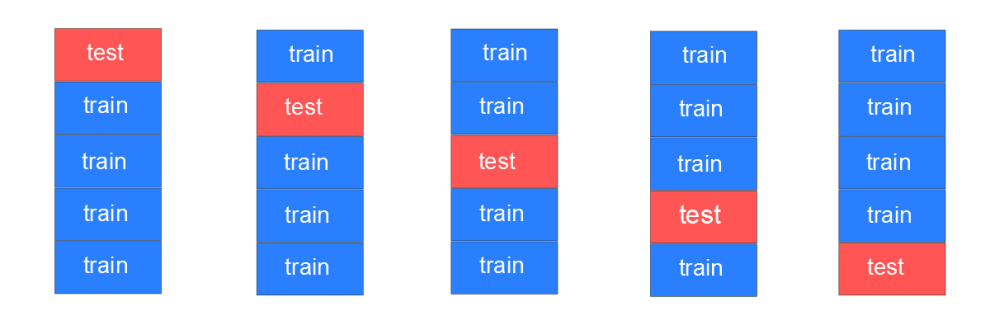

To do this, we use the ‘cross_val_score’ function with a cross-validation value of 5. 

The input to this ‘cross_val_score’ function is our k-NN model and the data. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5) #(model, train, test, cv)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


# Hypertuning model parameters using GridSearchCV

Go through a process to find the optimal parameters for your model to improve accuracy. 
In our case, we will use GridSearchCV to find the optimal value for "n_neighbors".

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier() #we don't need to set k value here
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

# Part 2 Logistic Regression

## So what's the difference between Linear Regression and Logistic regression?

In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values.

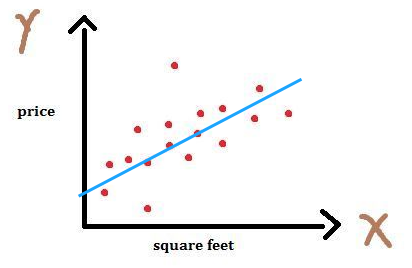





For instance, if X contains the area in square feet of houses, and Y contains the corresponding sale price of those houses, you could use linear regression to predict selling price as a function of house size. While the possible selling price may not actually be any, there are so many possible values that a linear regression model would be chosen.

If, instead, you wanted to predict, based on size, whether a house would sell for more than USD 200K, you would use logistic regression. The possible outputs are either Yes, the house will sell for more than USD 200K, or No, the house will not.

Linear Regression ---> Regression


Logistic Regression ---> Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

## Logistic regression on the titanic dataset
The first thing we are going to do is to read in the dataset using the Pandas' read_csv() function. We will put this data into a Pandas DataFrame, called "titanic", and name each of the columns.

In [ ]:
url = 'https://raw.githubusercontent.com/suhasbn/DS310/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Just a quick fyi (we will examine these variables more closely in a minute):

##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Checking that your target variable is binary
Since we are building a model to predict survival of passangers from the Titanic, our target is going to be "Survived" variable from the titanic dataframe. To make sure that it's a binary variable, let's use Seaborn's countplot() function.

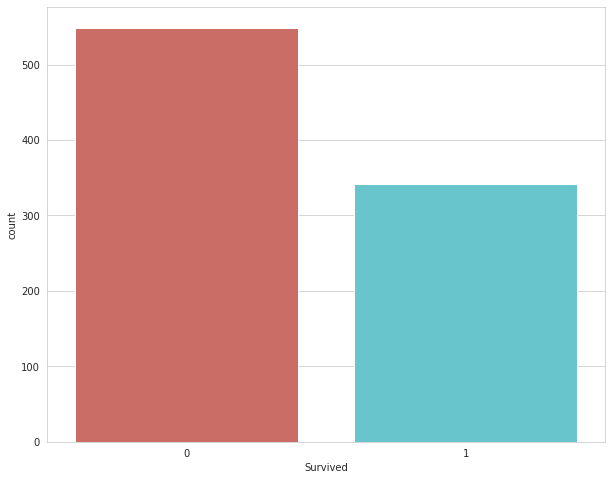

In [ ]:
sb.countplot(x='Survived',data=titanic, palette='hls')

Ok, so we see that the Survived variable is binary (0 - did not survive / 1 - survived)

### Checking for missing values
It's easy to check for missing values by calling the isnull() method, and the sum() method off of that, to return a tally of all the True values that are returned by the isnull() method.

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Well, how many records are there in the data frame anyway?

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ok, so there are only 891 rows in the titanic data frame. Cabin is almost all missing values, so we can drop that variable completely, but what about age? Age seems like a relevant predictor for survival right? We'd want to keep the variables, but it has 177 missing values. Yikes!! We are going to need to find a way to approximate for those missing values!

### Taking care of missing values
##### Dropping missing values
So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
- Survived - This variable is obviously relevant.
- Pclass - Does a passenger's class on the boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
- Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.

In [ ]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now we have the dataframe reduced down to only relevant variables, but now we need to deal with the missing values in the age variable.

#### Imputing missing values
Let's look at how passenger age is related to their class as a passenger on the boat.

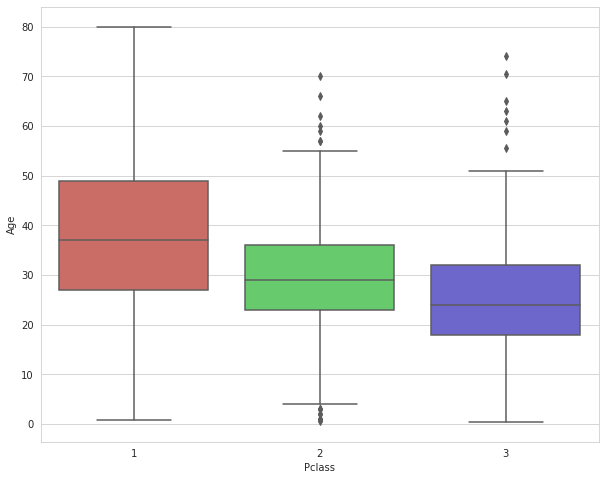

In [ ]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Speaking roughly, we could say that the younger a passenger is, the more likely it is for them to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. So there is a loose relationship between these variables. So, let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

So let's write a function that finds each null value in the Age variable, and for each null, checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.

In [ ]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

When we apply the function and check again for null values, we see that there are no more null values in the age variable.

In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

There are 2 null values in the embarked variable. We can drop those 2 records without loosing too much important information from our dataset, so we will do that.

In [ ]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Converting categorical variables to a dummy indicators
The next thing we need to do is reformat our variables so that they work with the model. Specifically, we need to reformat the Sex and Embarked variables into numeric variables.

In [ ]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head() #if male, return to 1, or return to 0

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now we have a dataset with all the variables in the correct format!

### Checking for independence between features

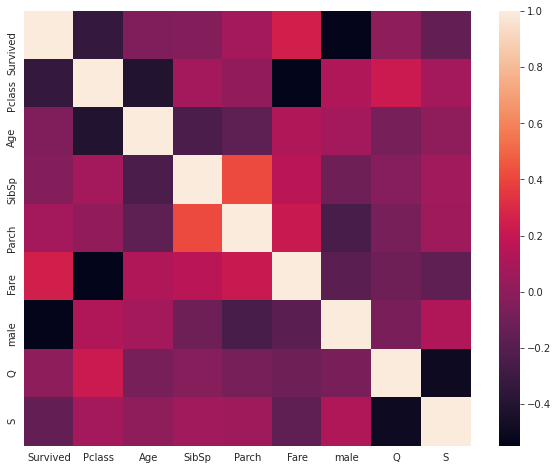

In [ ]:
sb.heatmap(titanic_dmy.corr())  

Fare and Pclass are not independent of each other, so I am going to drop these.

In [ ]:
titanic_dmy.drop(['Fare', 'Pclass'],axis=1,inplace=True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


### Checking that your dataset size is sufficient
We have 6 predictive features that remain. The rule of thumb is 50 records per feature... so we need to have at least 300 records in this dataset. Let's check again.

In [ ]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   male      889 non-null    uint8  
 5   Q         889 non-null    uint8  
 6   S         889 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


Ok, we have 889 records so we are fine.

In [ ]:
titanic_dmy.values[:,(1,2,3,4,5,6)].shape
X = titanic_dmy.values[:,(1,2,3,4,5,6)]
y = titanic_dmy.values[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

### Deploying and evaluating the model

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LogReg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[137,  27],
       [ 34,  69]])

In [ ]:
LogReg.score(X_test, y_test)

0.7715355805243446

TP = True Positives
TN = True Neg
FP = False Pos
FN = False Neg

The results from the confusion matrix are telling us that 137 and 69 are the number of correct predictions. 34 and 27 are the number of incorrect predictions.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       164
         1.0       0.72      0.67      0.69       103

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267




#-------------------------------------------------------
#Gentle Reminder
## Don't forget to work on Project 1 on Kaggle. (Due 10/10)
#-------------------------------------------------------



# Lab 3 Exercise (Due : 10/03 at 23:59 EST)

Your task is to implement the K-NN algorithm for the following dataset.
 
 Target attribute class:`{Iris Setosa, Iris Versicolour, Iris Virginica}`. 

Load the data using sklearn :
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

Also, refer https://scikit-learn.org/stable/datasets/index.html#iris-dataset if needed.
 To implement K-NN, you have to do the following :

1. Split data into a train and a test split (70% and 30% respectively).

2. Implement the following distance measures. 
To begin with you can implement the `(a) Euclidean Distance (l2 norm)`. 
What happens if you use `(b) Chebyshev` and `(c) L1`? Comment on your results / print out the results for the `ideal` N-neighbors.


